In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
retina_df = pd.read_csv("../Data/trainLabels.csv")
retina_df.head(5)

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [3]:
etiquetas_tipo = ["NO DR", "DR"]
retina_df['binary_type'] = retina_df['level'].map(lambda x: 'NO DR' if x == 0 else 'DR')
retina_df['binary_level'] = retina_df['level'].map(lambda x: 0 if x == 0 else 1)
retina_df.sample(5)

,image,level,binary_type,binary_level
29856,37759_left,0,NO DR,0
20243,25535_right,0,NO DR,0
12247,15375_right,2,DR,1
32312,40817_left,2,DR,1
9329,11741_right,0,NO DR,0


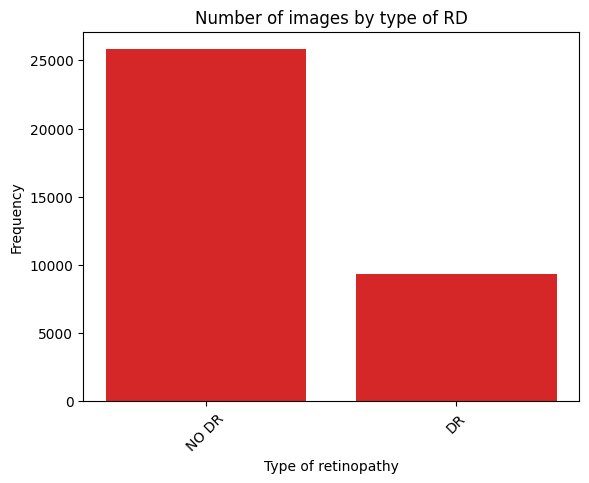

In [4]:
counts = retina_df['binary_type'].value_counts().reindex(etiquetas_tipo)
plt.bar(counts.index, counts.values, color='tab:red')
plt.title("Number of images by type of RD")
plt.xticks(rotation=45)
plt.xlabel("Type of retinopathy")
plt.ylabel("Frequency")
plt.show()

In [5]:
min_clases = counts.min()
clase = counts.idxmin()
print(f"La clase con menos imágenes es '{clase}' con {min_clases} imágenes.")

La clase con menos imágenes es 'DR' con 9316 imágenes.


In [6]:
retina_df_bal = retina_df.groupby(['binary_type'])[['image','level','binary_type','binary_level']].apply(lambda x: x.sample(3200, replace=False, random_state=42)).reset_index(drop=True)
retina_df_bal = retina_df_bal.sample(frac=1, random_state=42).reset_index(drop=True)

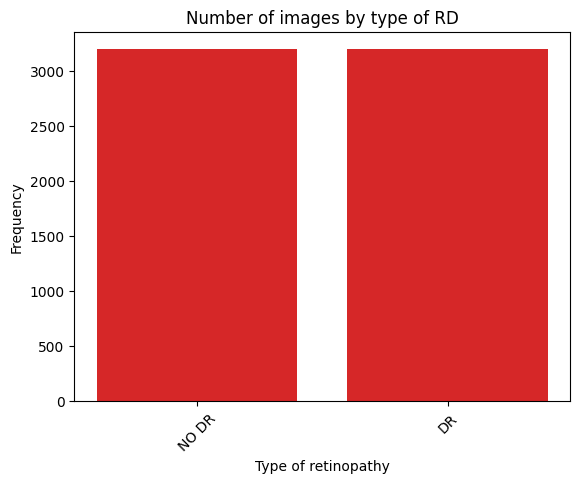

In [7]:
counts = retina_df_bal['binary_type'].value_counts().reindex(etiquetas_tipo)
plt.bar(counts.index, counts.values, color='tab:red')
plt.title("Number of images by type of RD")
plt.xticks(rotation=45)
plt.xlabel("Type of retinopathy")
plt.ylabel("Frequency")
plt.show()

In [8]:
counts

binary_type
NO DR    3200
DR       3200
Name: count, dtype: int64

In [9]:
retina_df_bal.to_csv('../Data/Retina_DF_BalType_Binary_3200.csv', index=False)